### Code Tutorial - Load and Wind Forecasting 
****
***
##### 1.) Load relevant Scripts:

****

In [1]:
%matplotlib notebook

import Specification
import DataProcessing
import ErrorAnalysis
import BoxJenkins
import DeepNetworks
import matplotlib.pyplot as plt

Using TensorFlow backend.


***
##### 2.) Within **config.json**  the model parameters are specified and loaded into Specs:

****

In [2]:
Specs = Specification.Specification()
Specs.datapath='Daten/sort/Wind/Fuerstenzell.csv'
Specs.bis='2018'
Specs.sep = ";"
Specs.sorder = (1,0,0,24)
Specs.__dict__

{'AnzahlPrognosen': 10,
 'BackTest': True,
 'ForecastCol': '0',
 'LSTM': False,
 'LSTM_Layers': '100',
 'Mode': '1',
 'bis': '2018',
 'datapath': 'Daten/sort/Wind/Fuerstenzell.csv',
 'exogCol': '',
 'filterweight': 5,
 'horizont': 24,
 'hourOfDay': 10,
 'location': 'Fuerstenzell',
 'mdlName': 'Mdl402S10124F5',
 'mdlPathBJ': 'C:/Users/DECLGRI/Desktop/Code/TSF-Backtesting-Suite/Models/BoxJenkinsModels/Wind/Fuerstenzell',
 'mdlPathNN': 'C:/Users/DECLGRI/Desktop/Code/TSF-Backtesting-Suite/Models/NeuralNetworkModels/Wind/Fuerstenzell',
 'modelHistory': 168,
 'order': (4, 0, 2),
 'scale': True,
 'sep': ';',
 'sorder': (1, 0, 0, 24),
 'timeseriesName': 'Wind',
 'von': '2014'}

***
##### 3.) **DataProcessing** creates a new pandas **dataframe**, a common datastructure for time series
***

In [5]:
dataObj = DataProcessing.DataProcessing(Specs.datapath)
dataObj.data

,WINDGESCHWINDIGKEIT,WINDRICHTUNG,NoFilter
MESS_DATUM,,,
2014-01-01 00:00:00,5.235200,280,5.2
2014-01-01 01:00:00,5.058237,280,4.8
2014-01-01 02:00:00,4.829163,270,4.0
2014-01-01 03:00:00,4.652156,270,4.5
2014-01-01 04:00:00,4.465559,260,5.2
2014-01-01 05:00:00,4.177285,270,4.0
2014-01-01 06:00:00,3.842136,280,4.3
2014-01-01 07:00:00,3.479455,250,3.0
2014-01-01 08:00:00,3.200159,240,2.4


***
##### 4.) Visualization of timeseries (to predict)
***

<IPython.core.display.Javascript object>


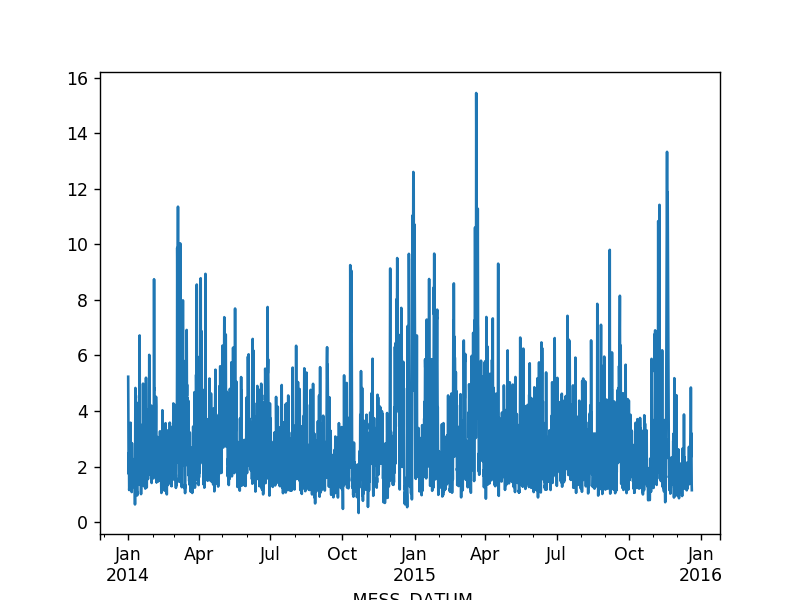

In [6]:
plt.figure()
dataObj.data[dataObj.data.columns[0]].plot()

##### 5.) Modelling & Predicting: Box-Jenkins Method

$$
\phi_p (L) \tilde \phi_P (L^s) \Delta^d \Delta_s^D y_t = c + \theta_q (L) \tilde \theta_Q (L^s) \epsilon_t
$$

- $\phi_p (L)$ non-seasonal, autoregressive lag-polynomial
- $\tilde \phi_P (L^s)$ seasonal, autoregressives lag-polynomial
- $\Delta^d \Delta_s^D y_t = y^* $ differentiated time series
- $c$ offset
- $\theta_q (L)$ non-seasonal moving-average lag-polynomial
- $\tilde \theta_Q (L^s)$ - $\theta_q (L)$ non-seasonal moving-average lag-polynomial

$Ly_t = y_{t-1},$ 



Example $ SARIMA(2,1,1)x(2,0,0)_{24}^  - process:$

$$
y_t^* = c + \phi_1 y_{t-1}^* + \phi_2 y_{t-2}^* + \tilde \phi_1 y_{t-24}^* +\tilde \phi_2 y_{t-48}^* - (\phi_1 \tilde \phi_1 y_{t-25}^* + \phi_2 \tilde \phi_1 y_{t-26}^*+ \phi_1 \tilde \phi_2 y_{t-49}^* + \phi_2 \tilde \phi_2 y_{t-50}^*)+\epsilon_t -\beta_1 \epsilon_{t-1} + c
$$

In [7]:
modelObj = BoxJenkins.BoxJenkins(dataObj,Specs)
modelObj.modelling()
%time modelObj.fitting(Specs.mdlName, Specs.mdlPathBJ)


Wall time: 1.51 s



Prediction with generated model(4, 0, 2)x(1, 0, 0, 24)


##### 1-step Prediction ##### 

MAE      0.394406
RMSE     0.562722
MAPE    13.872846
dtype: float64

##### 24-step Prediction ##### 

MAE      0.944603
RMSE     1.358493
MAPE    45.205341
dtype: float64


<IPython.core.display.Javascript object>


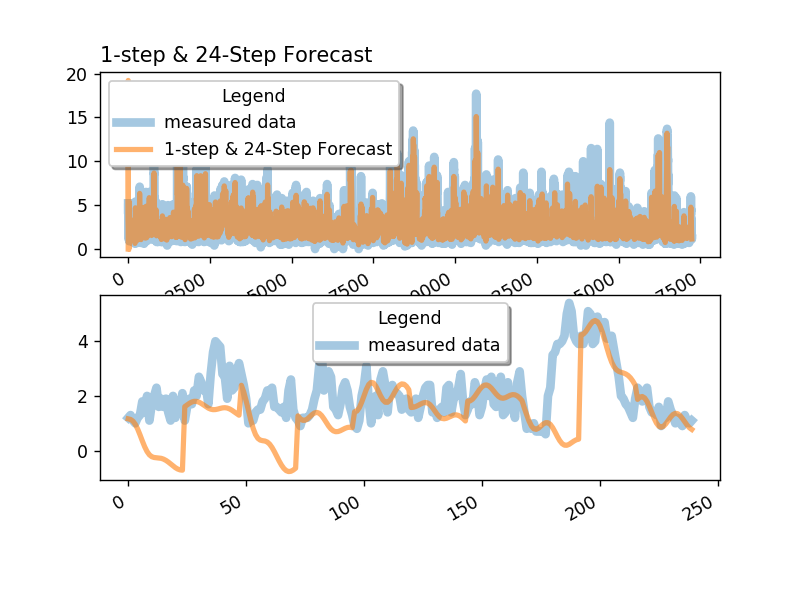

In [13]:
timeseries = dataObj.data["NoFilter"]
print("\nPrediction with generated model"+str(Specs.order)+"x"+str(Specs.sorder)+"\n\n")
pred1 = modelObj.predict1Step()

F1 = ErrorAnalysis.ErrorAnalysis(timeseries,modelObj.predicted.predicted_mean)
one = "##### 1-step Prediction ##### \n"
print(one)
print(F1.criterias)
ForecastDyn = modelObj.predictDyn(nstep=Specs.horizont,n=Specs.sorder[0],hourOfDay=Specs.hourOfDay,anzahl=Specs.AnzahlPrognosen)            
DataDyn = timeseries.loc[ForecastDyn.index]

FDyn = ErrorAnalysis.ErrorAnalysis(DataDyn,ForecastDyn)

multi = "\n##### "+str(Specs.horizont)+"-step Prediction ##### \n"

print(multi)
print(FDyn.criterias)

plt.figure()
ax = plt.subplot(2,1,1);
dataObj.visualize(ax, Specs.timeseriesName,'1-step & 24-Step Forecast', timeseries, pred1.predicted_mean)
ax1 = plt.subplot(2,1,2)
dataObj.visualize(ax1, Specs.timeseriesName,'', DataDyn,ForecastDyn)

##### 5.) Modelling & Predicting: LSTM Neural Networks
http://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [14]:

modelObj = DeepNetworks.DeepNetworks(dataObj, Specs, 10)
modelObj.modelling()
modelObj.fitting()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1, 504)            254520    
_________________________________________________________________
dense_2 (Dense)              (None, 1, 24)             12120     
Total params: 266,640
Trainable params: 266,640
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
567/567 [==============================] - 3s 6ms/step - loss: 0.0288
Epoch 2/10
567/567 [==============================] - 3s 5ms/step - loss: 0.0160
Epoch 3/10
567/567 [==============================] - 3s 5ms/step - loss: 0.0135
Epoch 4/10
567/567 [==============================] - 3s 5ms/step - loss: 0.0133
Epoch 5/10
567/567 [==============================] - 4s 6ms/step - loss: 0.0147
Epoch 6/10
567/567 [==============================] - 3s 6ms/step - loss: 0.0156
Epoch 7/10
567/567 [=====================


##### 24-step Prediction ##### 

Training:

MAE      1.081965
RMSE     1.531620
MAPE    37.230891
dtype: float64

Test:

MAE      1.106368
RMSE     1.618996
MAPE    41.965790
dtype: float64


<IPython.core.display.Javascript object>


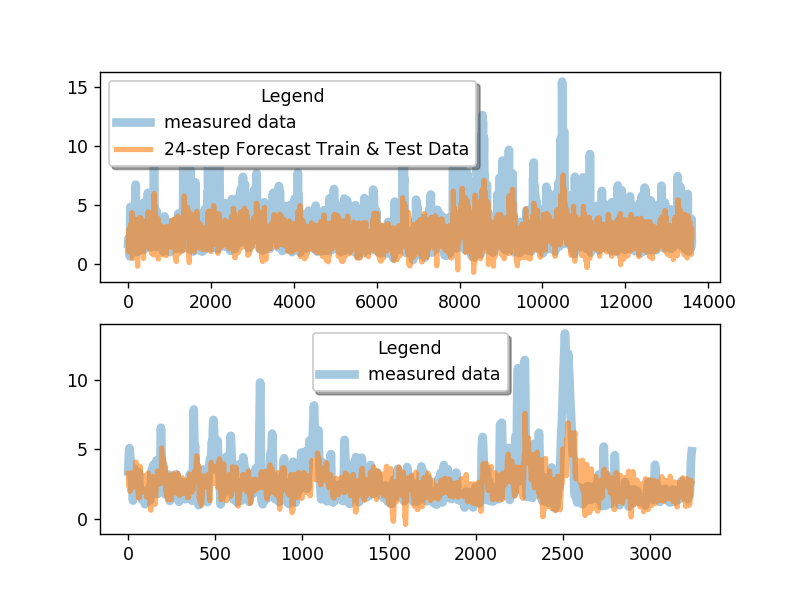

In [15]:
dataObj.Spec.Mode = "2"
trainPred, trainOut, testPred, testOut = modelObj.predict()
Ftrain = ErrorAnalysis.ErrorAnalysis(trainOut.flatten(), trainPred.flatten())
Ftest = ErrorAnalysis.ErrorAnalysis(testOut.flatten(), testPred.flatten())
print(multi)
print("Training:\n")
print(Ftrain.criterias)
print("\nTest:\n")
print(Ftest.criterias)

plt.figure()
ax = plt.subplot(2,1,1)
dataObj.visualize(ax, Specs.timeseriesName,str(Specs.horizont)+'-step Forecast Train & Test Data',trainOut.flatten(), trainPred.flatten())
ax1 = plt.subplot(2,1,2)
multi = "\n##### "+str(Specs.horizont)+"-step Prediction ##### \n"
dataObj.visualize(ax, Specs.timeseriesName,'',testOut.flatten(), testPred.flatten())
